## Libraries

In [3]:
import pandas as pd

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [4]:
import sys
print(sys.executable)

/Users/ursulasalwa/anaconda3/bin/python


## Preprocessing Phase

#### Importing the datasets (train and test). 
- The training dataset includes data that has the last cycle before the engine failed.
- The test dataset does not have the above data, thus this will be used for the model creation. 
- The files are of .txt form, thus we must separate with a space each value to denote the next column.

In [5]:
train_df = pd.read_csv('PM_train.txt',sep=' ',header=None) # the values are in txt file so they should be separated by a space to distinguish what the values are
test_df = pd.read_csv('PM_test.txt',sep=' ',header=None)

**Data Labels**

In [6]:
train_df.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

In [7]:
train_df.tail()

0    1       2       3      4       5       6        7        8   \
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     23     24       25  \
20626  14.62  ...  8137.60  8.4956  0.03  397  2388  100.0  38.49  22.9735   
20627  14.62  ...  8136.50  8.5139  0.03  395  2388  100.0  38.30  23.1594   
20628  14.62  ...  8141.05  8.5646  0.03  398  2388  100.0  38.44  22.9333   
20629  14.62  ...  8139.29  8.5389  0.03  395  2388  100.0  38.29  23.0640   
20630  14.62  ...  8137.33  8.5036  0.03  396  2388  100.0  38.37  23.0522   

       26  27  
20626 NaN NaN  
20627 NaN NaN  
20628 NaN NaN  
20629 NaN NaN  
20630 NaN NaN  

[5 rows x 28 columns]

In [8]:
display(pd.concat([train_df.head(), train_df.tail()]))

0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     23     24       25  \
0      14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190   
1      14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236   
2      14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442   
3      14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739   
4      14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044   
20626  14.62  ...  8137.60  8.4956  0.03  397  2388  100.0  38.49  22.9735   
20627  14.62  ...  8136.50  8.5139  0.03  395  2388  100.0  38.30  23.1594   
20628  14.62  ...  8141.05  8.5646  0.03  398  2388  100.0  38.44  22.9333   
20629  14.62  ...  8139.29  8.5389  0.03  395  2388  100.0  38.29  23.0640   
20630  14.62  ...  8137.33  8.5036  0.03  396  2388  100.0  38.37  23.0522   

       26  27  
0     NaN NaN  
1     NaN NaN  
2     NaN NaN  
3     NaN NaN  
4     NaN NaN  
20626 NaN NaN  
20627 NaN NaN  
20628 NaN NaN  
20629 NaN NaN  
20630 NaN NaN  

[10 rows x 28 columns]

In [9]:
train_df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
      dtype='int64')

In [10]:
test_df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
      dtype='int64')

*The columns do not have labels for what each value shows, so we know that this should be updated.*

In [11]:
column_names = ['ID','Cycle','Setting1','Setting2','Setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'
               ,'s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23']

train_df.columns = column_names
test_df.columns = column_names

In [12]:
train_df.head(2)

ID  Cycle  Setting1  Setting2  Setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   

      s5  ...      s14     s15   s16  s17   s18    s19    s20      s21  s22  \
0  14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190  NaN   
1  14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236  NaN   

   s23  
0  NaN  
1  NaN  

[2 rows x 28 columns]

In [13]:
test_df.head(2)

ID  Cycle  Setting1  Setting2  Setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   

      s5  ...      s14     s15   s16  s17   s18    s19    s20      s21  s22  \
0  14.62  ...  8125.55  8.4052  0.03  392  2388  100.0  38.86  23.3735  NaN   
1  14.62  ...  8139.62  8.3803  0.03  393  2388  100.0  39.02  23.3916  NaN   

   s23  
0  NaN  
1  NaN  

[2 rows x 28 columns]

*Now the columns make more sense, so we can move on to the next steps of checking the data values for missing (NaN) and duplicates.*

#### Missing Values - dropna method

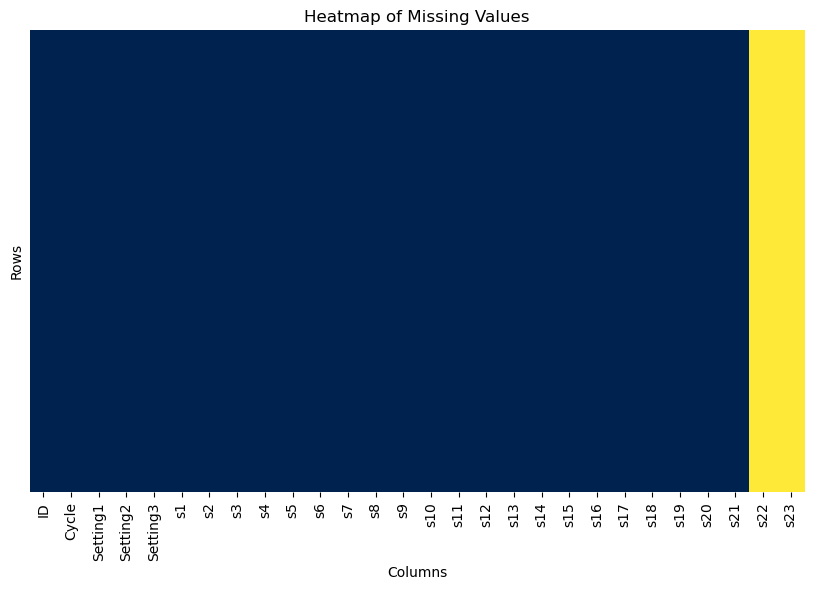

In [14]:
# Create a boolean DataFrame indicating missing values
missing_values = train_df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap='cividis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [15]:
train_df.dropna(axis=1, inplace = True) # checking columns and not creating new df
train_df.head()

ID  Cycle  Setting1  Setting2  Setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

In [16]:
# Updates list of column names:
column_names = train_df.columns.tolist()
print(column_names)

['ID', 'Cycle', 'Setting1', 'Setting2', 'Setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [17]:
test_df.dropna(axis=1, inplace = True) # checking columns and not creating new df
test_df.head()

ID  Cycle  Setting1  Setting2  Setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0   

     s20      s21  
0  38.86  23.3735  
1  39.02  23.3916  
2  39.08  23.4166  
3  39.00  23.3737  
4  38.99  23.4130  

[5 rows x 26 columns]

In [18]:
column_names = test_df.columns.tolist()
print(column_names)

['ID', 'Cycle', 'Setting1', 'Setting2', 'Setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


*We see that the last two columns for both dataframes were dropped.*

#### Duplicate Values
*Transposing table to be able to use .duplicated() method.*

In [19]:
train_df_T = train_df.T
train_df_T.head(100)

0          1          2          3          4          5      \
ID           1.0000     1.0000     1.0000     1.0000     1.0000     1.0000   
Cycle        1.0000     2.0000     3.0000     4.0000     5.0000     6.0000   
Setting1    -0.0007     0.0019    -0.0043     0.0007    -0.0019    -0.0043   
Setting2    -0.0004    -0.0003     0.0003     0.0000    -0.0002    -0.0001   
Setting3   100.0000   100.0000   100.0000   100.0000   100.0000   100.0000   
s1         518.6700   518.6700   518.6700   518.6700   518.6700   518.6700   
s2         641.8200   642.1500   642.3500   642.3500   642.3700   642.1000   
s3        1589.7000  1591.8200  1587.9900  1582.7900  1582.8500  1584.4700   
s4        1400.6000  1403.1400  1404.2000  1401.8700  1406.2200  1398.3700   
s5          14.6200    14.6200    14.6200    14.6200    14.6200    14.6200   
s6          21.6100    21.6100    21.6100    21.6100    21.6100    21.6100   
s7         554.3600   553.7500   554.2600   554.4500   554.0000   554.6700   
s8        2388.0600  2388.0400  2388.0800  2388.1100  2388.0600  2388.0200   
s9        9046.1900  9044.0700  9052.9400  9049.4800  9055.1500  9049.6800   
s10          1.3000     1.3000     1.3000     1.3000     1.3000     1.3000   
s11         47.4700    47.4900    47.2700    47.1300    47.2800    47.1600   
s12        521.6600   522.2800   522.4200   522.8600   522.1900   521.6800   
s13       2388.0200  2388.0700  2388.0300  2388.0800  2388.0400  2388.0300   
s14       8138.6200  8131.4900  8133.2300  8133.8300  8133.8000  8132.8500   
s15          8.4195     8.4318     8.4178     8.3682     8.4294     8.4108   
s16          0.0300     0.0300     0.0300     0.0300     0.0300     0.0300   
s17        392.0000   392.0000   390.0000   392.0000   393.0000   391.0000   
s18       2388.0000  2388.0000  2388.0000  2388.0000  2388.0000  2388.0000   
s19        100.0000   100.0000   100.0000   100.0000   100.0000   100.0000   
s20         39.0600    39.0000    38.9500    38.8800    38.9000    38.9800   
s21         23.4190    23.4236    23.3442    23.3739    23.4044    23.3669   

              6          7          8          9      ...      20621  \
ID           1.0000     1.0000     1.0000     1.0000  ...   100.0000   
Cycle        7.0000     8.0000     9.0000    10.0000  ...   191.0000   
Setting1     0.0010    -0.0034     0.0008    -0.0033  ...    -0.0005   
Setting2     0.0001     0.0003     0.0001     0.0001  ...    -0.0000   
Setting3   100.0000   100.0000   100.0000   100.0000  ...   100.0000   
s1         518.6700   518.6700   518.6700   518.6700  ...   518.6700   
s2         642.4800   642.5600   642.1200   641.7100  ...   643.6900   
s3        1592.3200  1582.9600  1590.9800  1591.2400  ...  1610.8700   
s4        1397.7700  1400.9700  1394.8000  1400.4600  ...  1427.1900   
s5          14.6200    14.6200    14.6200    14.6200  ...    14.6200   
s6          21.6100    21.6100    21.6100    21.6100  ...    21.6100   
s7         554.3400   553.8500   553.6900   553.5900  ...   551.7800   
s8        2388.0200  2388.0000  2388.0500  2388.0500  ...  2388.2600   
s9        9059.1300  9040.8000  9046.4600  9051.7000  ...  9068.9000   
s10          1.3000     1.3000     1.3000     1.3000  ...     1.3000   
s11         47.3600    47.2400    47.2900    47.0300  ...    48.0700   
s12        522.3200   522.4700   521.7900   521.7900  ...   519.8000   
s13       2388.0300  2388.0300  2388.0500  2388.0600  ...  2388.2800   
s14       8132.3200  8131.0700  8125.6900  8129.3800  ...  8143.5600   
s15          8.3974     8.4076     8.3728     8.4286  ...     8.5092   
s16          0.0300     0.0300     0.0300     0.0300  ...     0.0300   
s17        392.0000   391.0000   392.0000   393.0000  ...   398.0000   
s18       2388.0000  2388.0000  2388.0000  2388.0000  ...  2388.0000   
s19        100.0000   100.0000   100.0000   100.0000  ...   100.0000   
s20         39.1000    38.9700    39.0500    38.9500  ...    38.3900   
s21         23.3774    23.3106    2

Let's check which column is a duplicate of another.

In [20]:
duplicates_columns = train_df_T.duplicated()
print(duplicates_columns)

ID          False
Cycle       False
Setting1    False
Setting2    False
Setting3    False
s1          False
s2          False
s3          False
s4          False
s5          False
s6          False
s7          False
s8          False
s9          False
s10         False
s11         False
s12         False
s13         False
s14         False
s15         False
s16         False
s17         False
s18         False
s19          True
s20         False
s21         False
dtype: bool


If we were to have many more columns, we cannot look at the data so visually and we need to write some code that identifies where the duplicates exactly are.
- Here we saw that s19 is a duplicate of some column, but it is unclear which one. We only want to delete the duplicates within the sensors. We do not want to compare duplicates to that of the setting/cycle/ID. 

In [21]:
duplicate_relationships = {}

for col in train_df_T.index[duplicates_columns]: # only checks for columns that are duplicates
    # Find the first column that is the same as the current column
    duplicate_of = train_df_T.index[(train_df_T.index != col) & (train_df_T == train_df_T.loc[col]).all(axis=1)].tolist()
    if duplicate_of:
        duplicate_relationships[col] = duplicate_of[0]

# Output the duplicate relationships
if duplicate_relationships:
    print("Duplicate column relationships found:")
    for col, duplicate_of in duplicate_relationships.items():
        print(f"'{col}' is a duplicate of '{duplicate_of}'")
else:
    print("No duplicate columns found")

Duplicate column relationships found:
's19' is a duplicate of 'Setting3'


Since Setting3 and s19, we should not drop any columns. However, the code needs to be flexible to other datasets, thus we need to create a code that drops any columns that are duplicates within the sensors. 

In [22]:
# Identify duplicate columns among 's1' through 's21'
duplicates = []
for i in range(1, 22):
    s_col = 's' + str(i)
    if s_col in train_df_T.columns and train_df_T.duplicated(subset=s_col).any():
        duplicates.append(s_col)

# Drop duplicate columns if they are duplicates within 's1' through 's21'
train_df_T.drop(columns=duplicates, inplace=True)

print("DataFrame after dropping duplicate 's' columns:")
print(train_df_T)

DataFrame after dropping duplicate 's' columns:
              0          1          2          3          4          5      \
ID           1.0000     1.0000     1.0000     1.0000     1.0000     1.0000   
Cycle        1.0000     2.0000     3.0000     4.0000     5.0000     6.0000   
Setting1    -0.0007     0.0019    -0.0043     0.0007    -0.0019    -0.0043   
Setting2    -0.0004    -0.0003     0.0003     0.0000    -0.0002    -0.0001   
Setting3   100.0000   100.0000   100.0000   100.0000   100.0000   100.0000   
s1         518.6700   518.6700   518.6700   518.6700   518.6700   518.6700   
s2         641.8200   642.1500   642.3500   642.3500   642.3700   642.1000   
s3        1589.7000  1591.8200  1587.9900  1582.7900  1582.8500  1584.4700   
s4        1400.6000  1403.1400  1404.2000  1401.8700  1406.2200  1398.3700   
s5          14.6200    14.6200    14.6200    14.6200    14.6200    14.6200   
s6          21.6100    21.6100    21.6100    21.6100    21.6100    21.6100   
s7         554.3

In [23]:
# Identify duplicate columns among 'Setting1' through 'Setting3'
duplicates = []
for i in range(1, 3):
    setting_col = 'Setting' + str(i)
    if setting_col in train_df_T.columns and train_df_T.duplicated(subset=setting_col).any():
        duplicates.append(setting_col)

# Drop duplicate columns if they are duplicates within 's1' through 's21'
train_df_T.drop(columns=duplicates, inplace=True)

print("DataFrame after dropping duplicate 'Setting' columns:")
print(train_df_T)

DataFrame after dropping duplicate 'Setting' columns:
              0          1          2          3          4          5      \
ID           1.0000     1.0000     1.0000     1.0000     1.0000     1.0000   
Cycle        1.0000     2.0000     3.0000     4.0000     5.0000     6.0000   
Setting1    -0.0007     0.0019    -0.0043     0.0007    -0.0019    -0.0043   
Setting2    -0.0004    -0.0003     0.0003     0.0000    -0.0002    -0.0001   
Setting3   100.0000   100.0000   100.0000   100.0000   100.0000   100.0000   
s1         518.6700   518.6700   518.6700   518.6700   518.6700   518.6700   
s2         641.8200   642.1500   642.3500   642.3500   642.3700   642.1000   
s3        1589.7000  1591.8200  1587.9900  1582.7900  1582.8500  1584.4700   
s4        1400.6000  1403.1400  1404.2000  1401.8700  1406.2200  1398.3700   
s5          14.6200    14.6200    14.6200    14.6200    14.6200    14.6200   
s6          21.6100    21.6100    21.6100    21.6100    21.6100    21.6100   
s7        

#### Description of Data

In [24]:
train_df.describe()

ID         Cycle      Setting1      Setting2  Setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862     -0.000009      0.000002     100.0   
std       29.227633     68.880990      0.002187      0.000293       0.0   
min        1.000000      1.000000     -0.008700     -0.000600     100.0   
25%       26.000000     52.000000     -0.001500     -0.000200     100.0   
50%       52.000000    104.000000      0.000000      0.000000     100.0   
75%       77.000000    156.000000      0.001500      0.000300     100.0   
max      100.000000    362.000000      0.008700      0.000600     100.0   

                 s1            s2            s3            s4            s5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...           s12           s13           s14           s15  \
count  ...  20631.000000  20631.000000  20631.000000  20631.000000   
mean   ...    521.413470   2388.096152   8143.752722      8.442146   
std    ...      0.737553      0.071919     19.076176      0.037505   
min    ...    518.690000   2387.880000   8099.940000      8.324900   
25%    ...    520.960000   2388.040000   8133.245000      8.414900   
50%    ...    521.480000   2388.090000   8140.540000      8.438900   
75%    ...    521.950000   2388.140000   8148.310000      8.465600   
max    ...    523.380000   2388.560000   8293.720000      8.584800   

                s16           s17      s18      s19           s20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

                s21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

#### Checking if the cycles have the correct number of cycles based on te maximum values. 

In [25]:
engine_counts = train_df['ID'].value_counts()
train_df['ID']

0          1
1          1
2          1
3          1
4          1
        ... 
20626    100
20627    100
20628    100
20629    100
20630    100
Name: ID, Length: 20631, dtype: int64

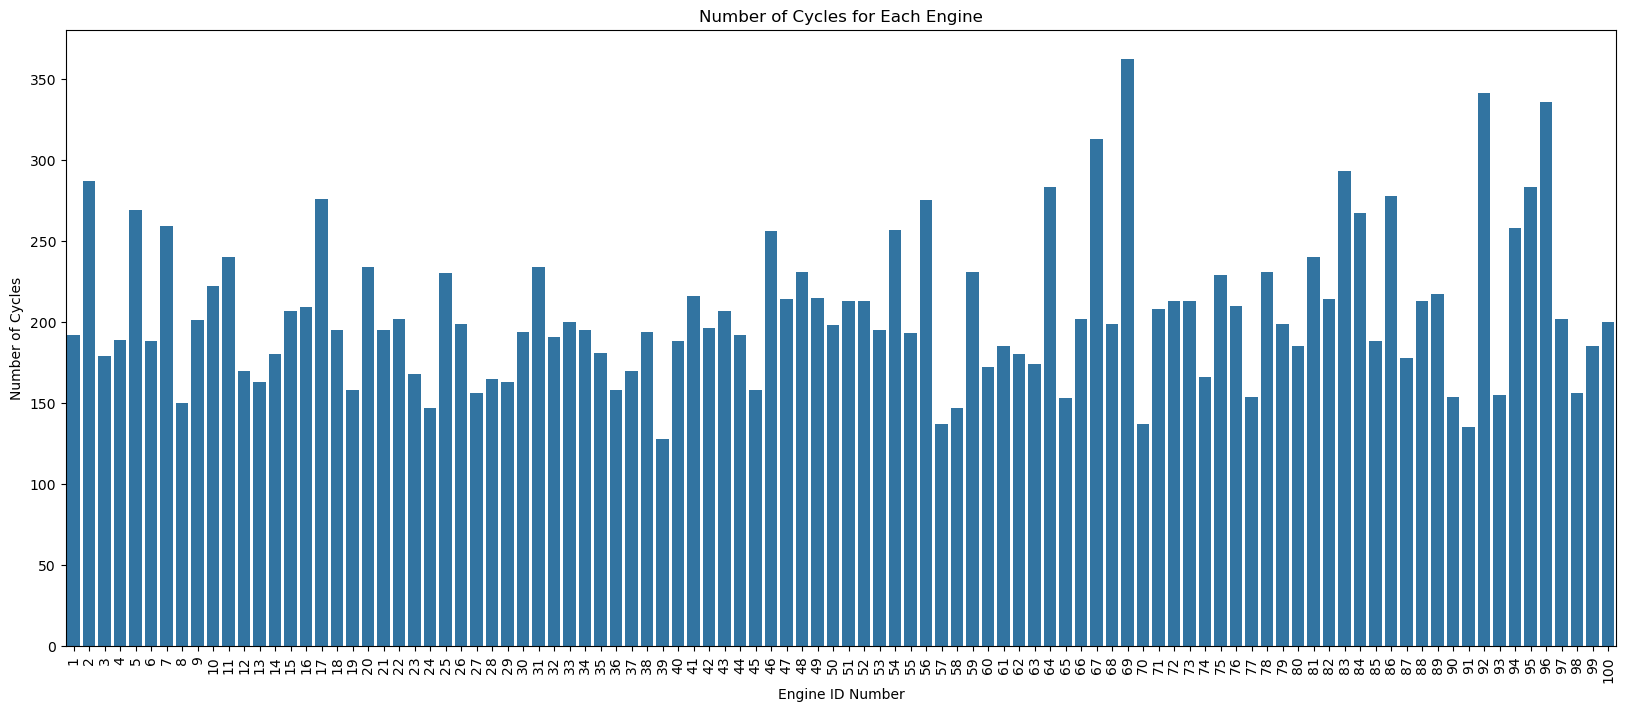

In [26]:
engine_counts = train_df['ID'].value_counts().reset_index()
engine_counts.columns = ['ID', 'count']

# Drawing bars with seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='ID', y='count', data=engine_counts)
plt.title('Number of Cycles for Each Engine')
plt.xlabel('Engine ID Number')
plt.ylabel('Number of Cycles')
plt.xticks(rotation=90)
plt.show()

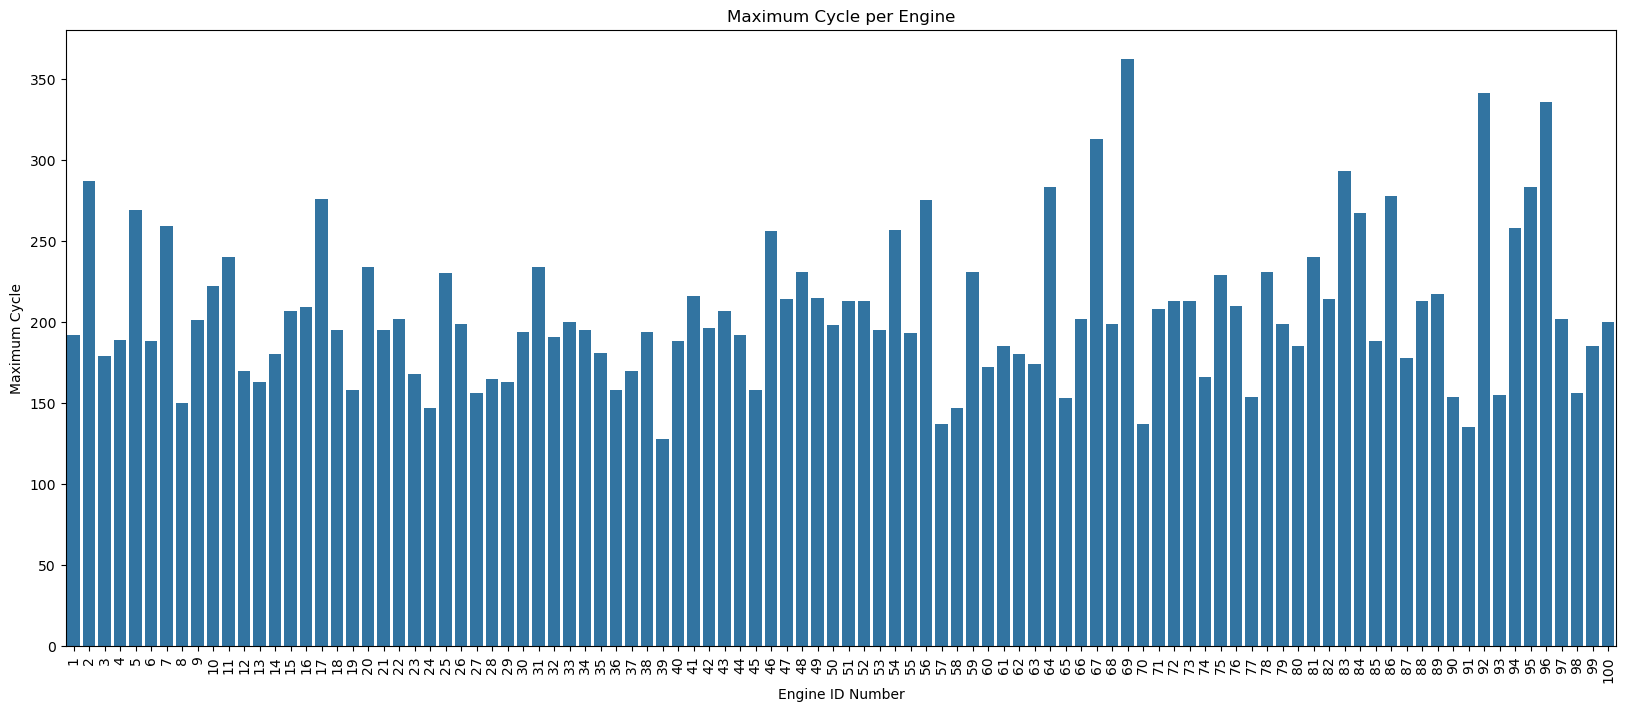

In [27]:
# Get the maximum 'cycle' value for each engine
max_cycle_per_engine = train_df.groupby('ID')['Cycle'].max().reset_index()

# Rename columns
max_cycle_per_engine.columns = ['ID', 'max_cycle']

# Sort by 'engine' column
max_cycle_per_engine = max_cycle_per_engine.sort_values('ID')

# Drawing bar graphs
plt.figure(figsize=(20, 8))
sns.barplot(x=max_cycle_per_engine['ID'].astype(str), y=max_cycle_per_engine['max_cycle'], data=engine_counts)
plt.title('Maximum Cycle per Engine')
plt.xlabel('Engine ID Number')
plt.ylabel('Maximum Cycle')
plt.xticks(rotation=90)
plt.show()

### Pairplot for Desired Engine

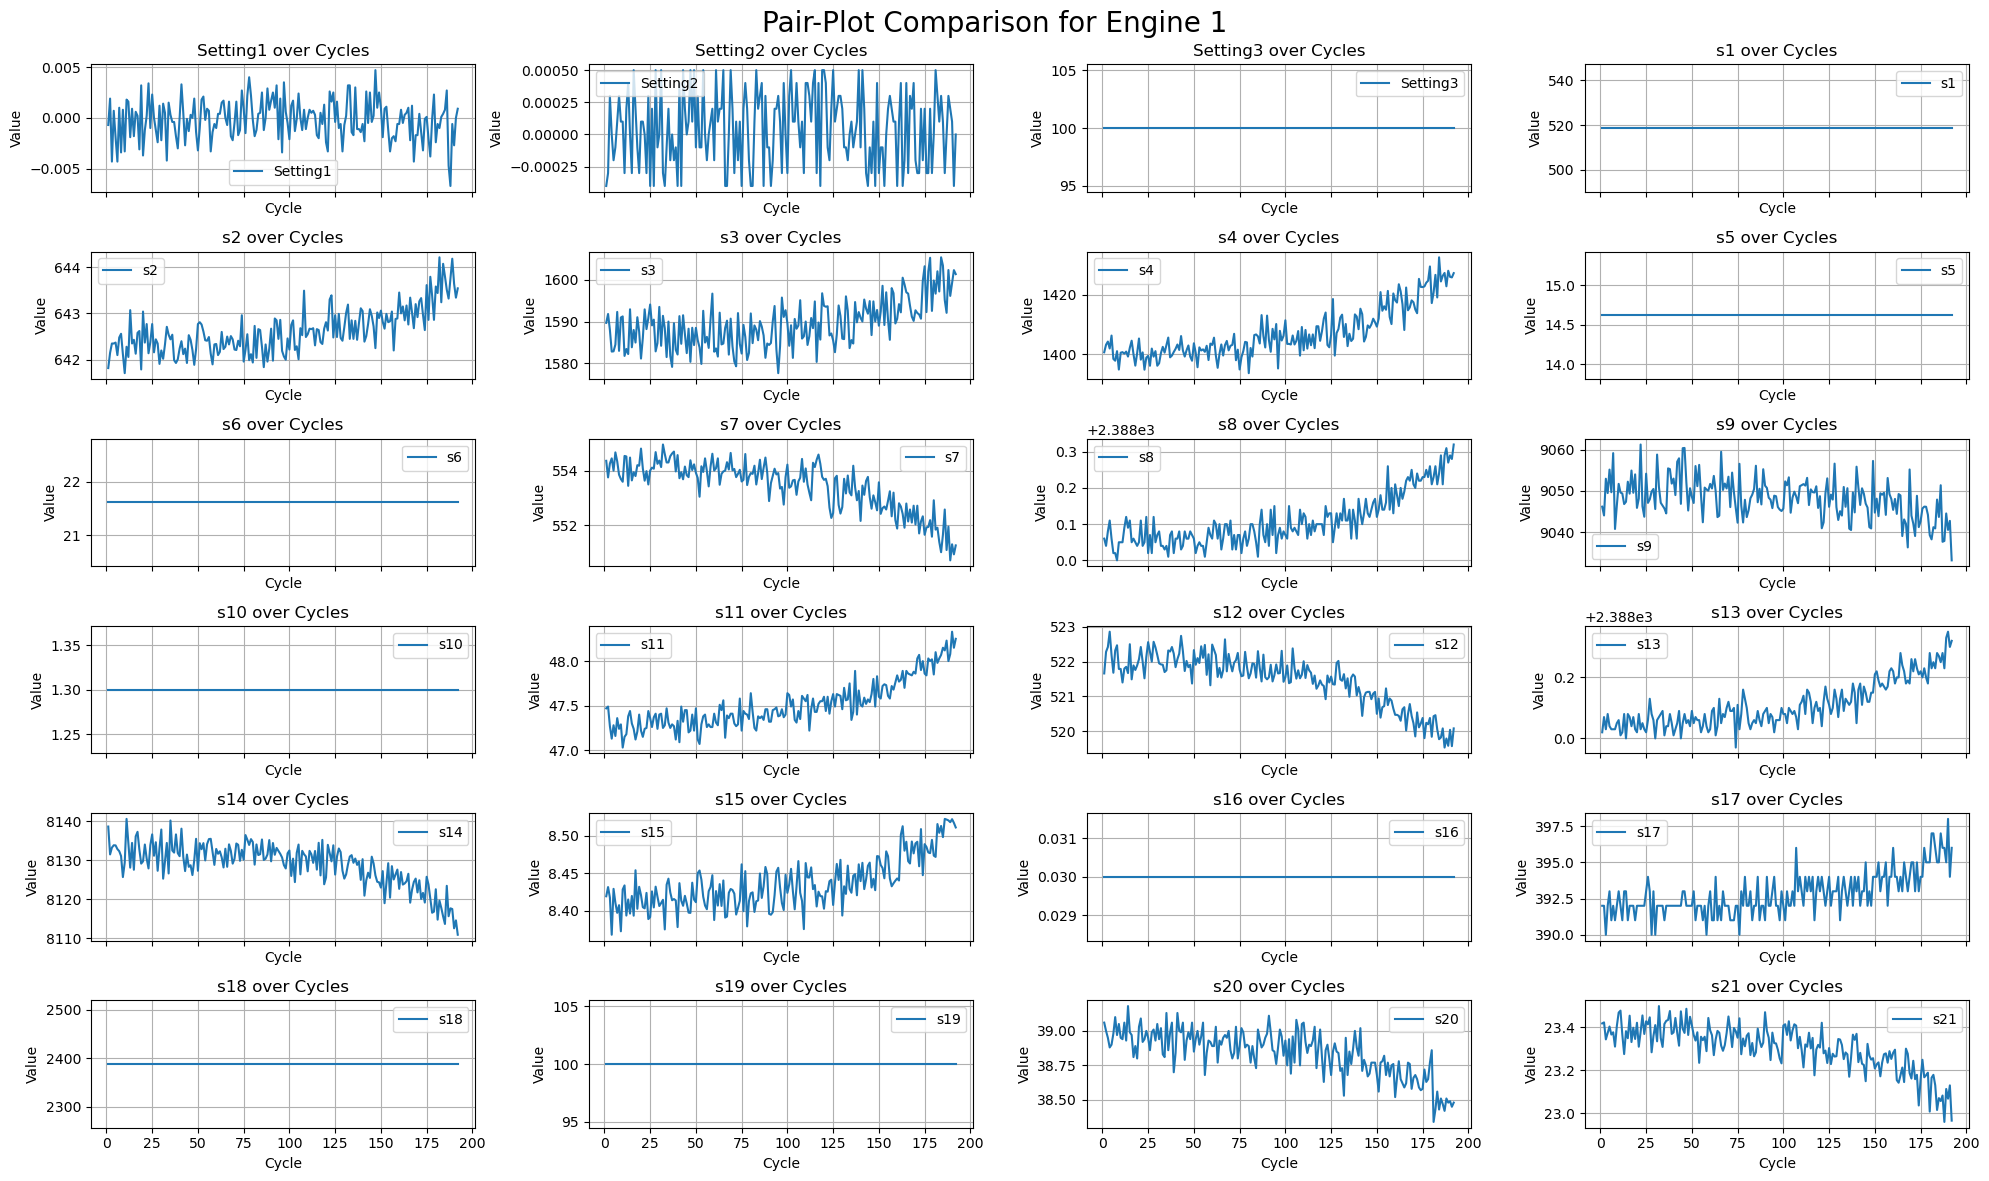

In [28]:
# Select a specific engine number
engine_number = 1 # Replace with the engine number you want to analyze
engine_data = train_df[train_df['ID'] == engine_number]

# The list contains all setting and sensor columns
columns_to_plot = ['Setting1', 'Setting2', 'Setting3'] + [f's{i}' for i in range(1, 22)]

# The list contains all the setting and sensor columns
num_columns = 4
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # 计算行数
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 2), sharex=True)

# Plot individual line plots for each setting and sensor
for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.plot(engine_data['Cycle'], engine_data[column], label=column)
    ax.set_title(f'{column} over Cycles')
    ax.set_xlabel('Cycle')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

# Adjust the layout so that subgraphs do not overlap
plt.suptitle(f'Pair-Plot Comparison for Engine {engine_number}', fontsize=20)
plt.tight_layout()
plt.show()

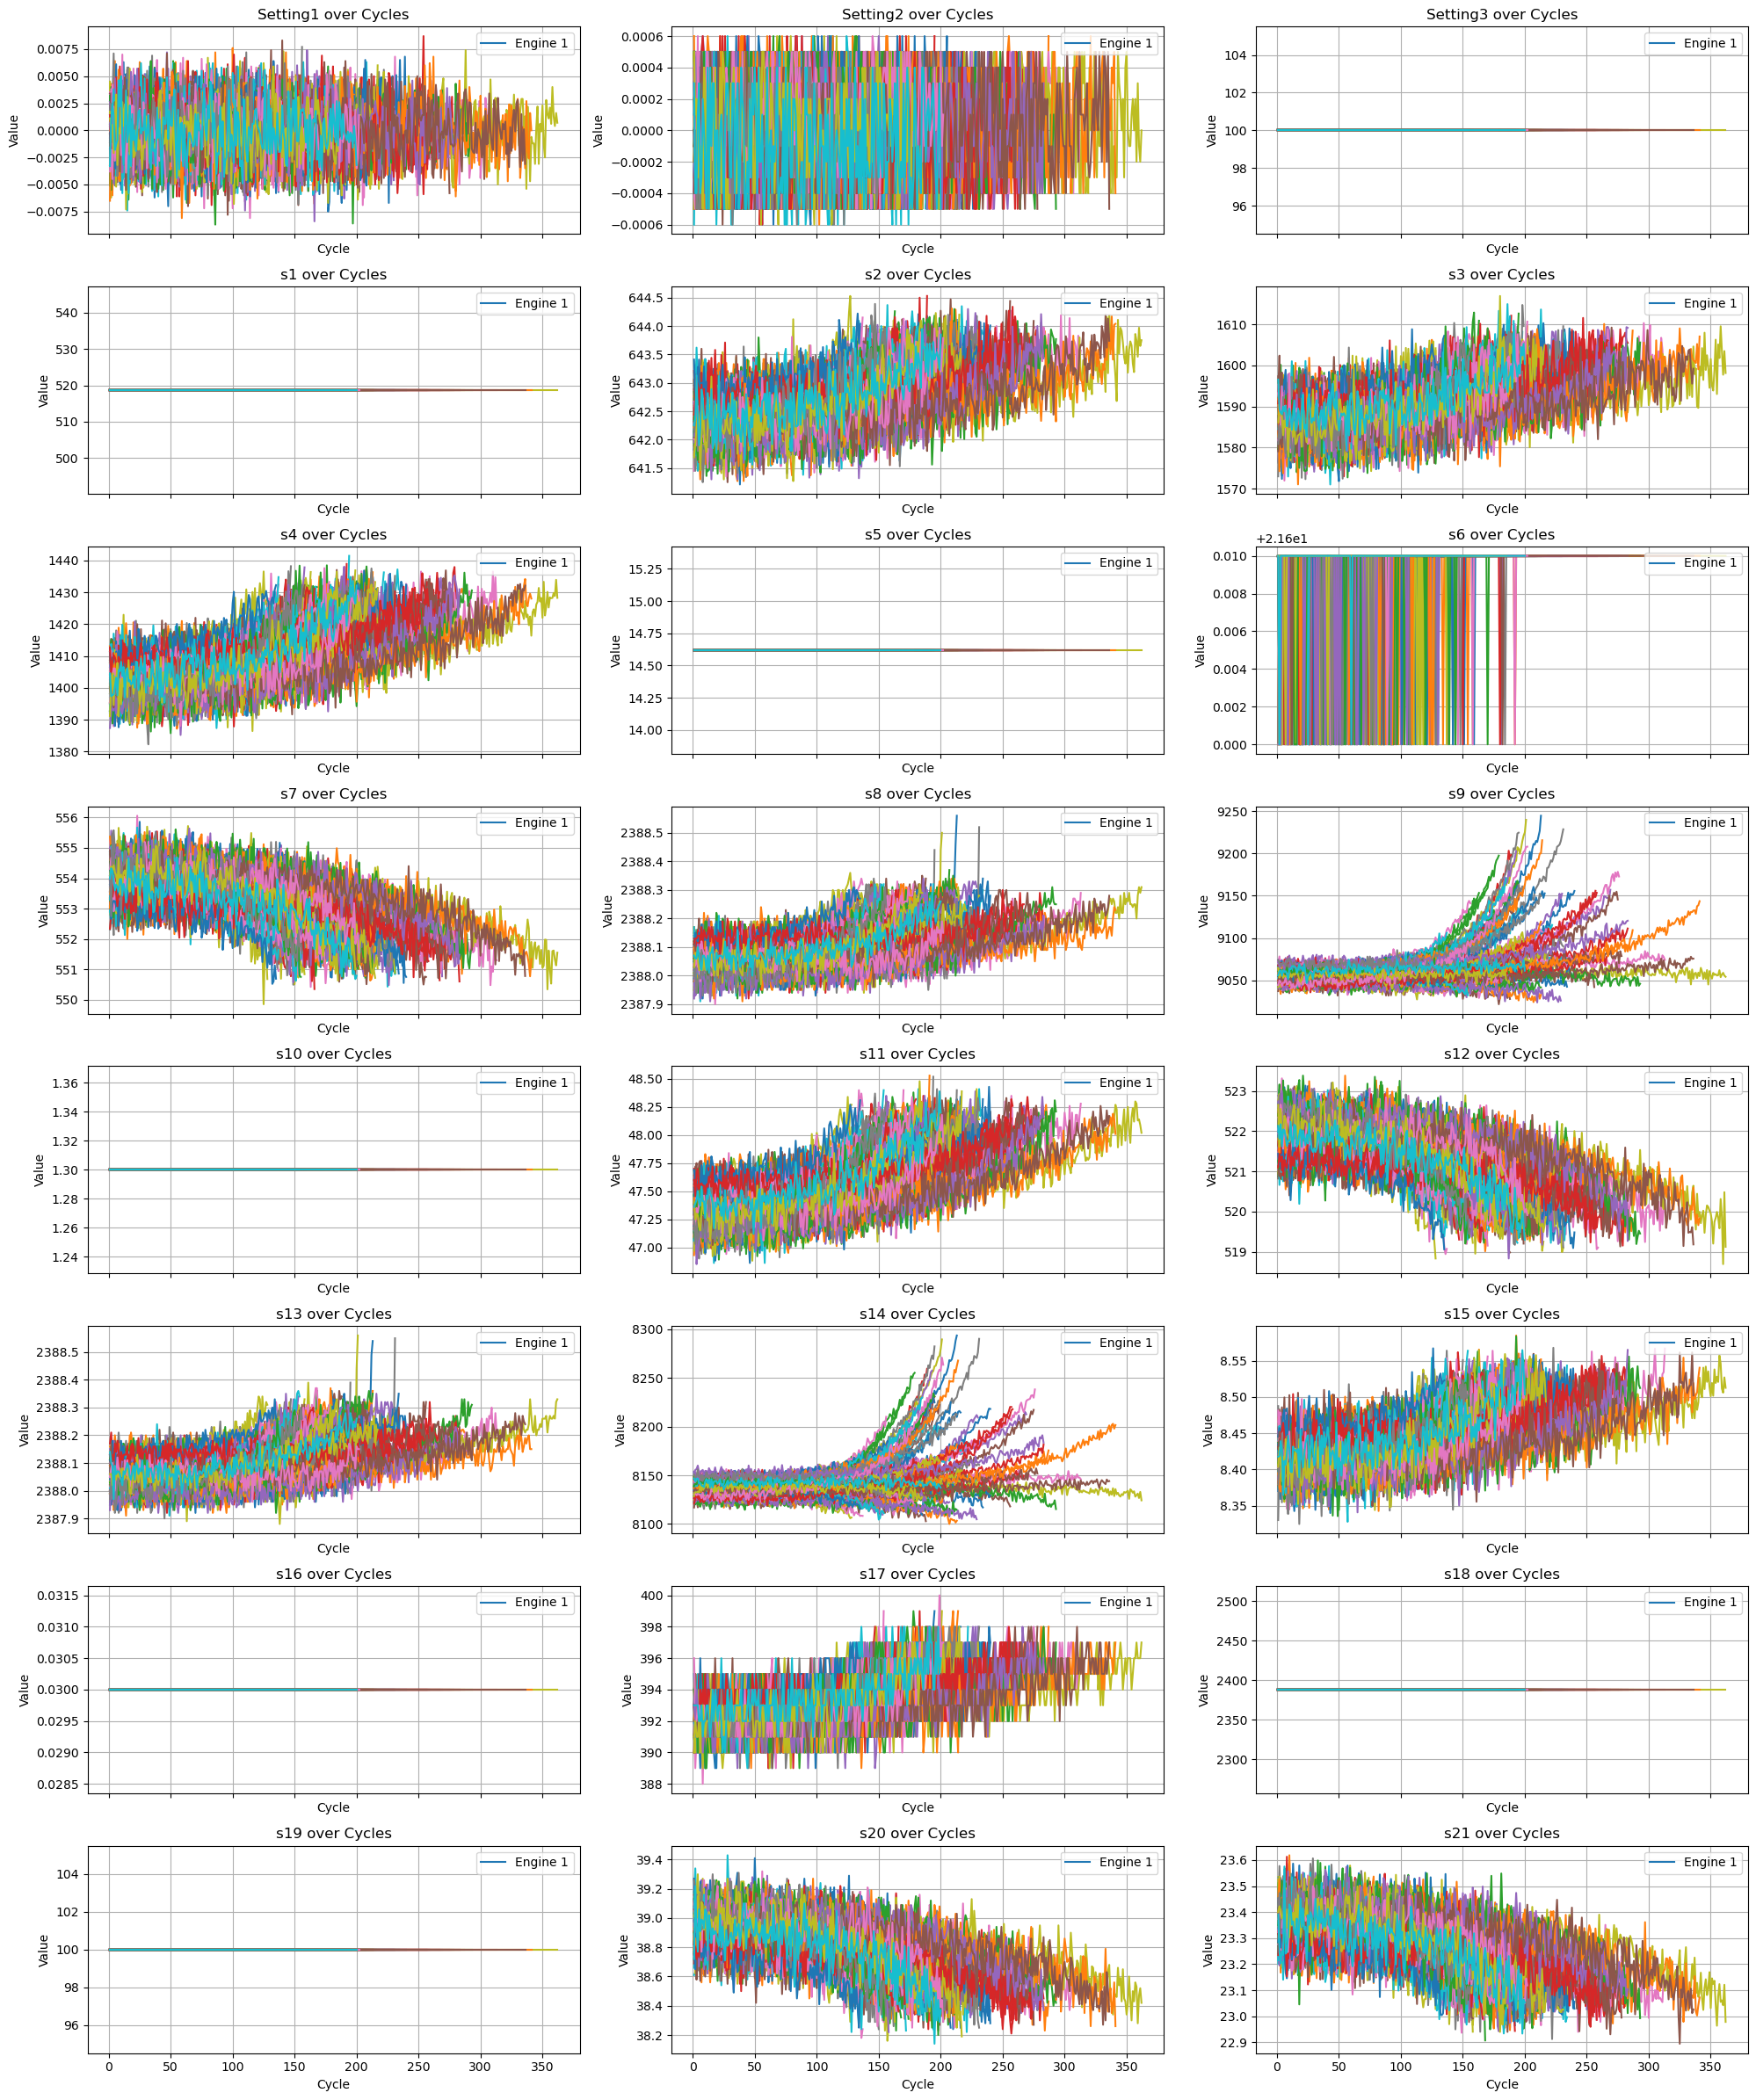

In [29]:
# Select the range of engine numbers to be plotted
engines_to_plot = range(1, 101)  # Engine numbers from 1 to 100

# 列表包含所有的 setting 和 sensor 列
columns_to_plot = ['Setting1', 'Setting2', 'Setting3'] + [f's{i}' for i in range(1, 22)]

# The list contains all the setting and sensor columns
num_columns = 3
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # 计算行数
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 3), sharex=True)

# Iterate over each engine number and plot the lines
for engine_number in engines_to_plot:
    engine_data = train_df[train_df['ID'] == engine_number]
    for ax, column in zip(axes.flatten(), columns_to_plot):
        ax.plot(engine_data['Cycle'], engine_data[column], label=f'Engine {engine_number}' if engine_number == 1 else "")

# Setting up titles, labels and grids for subgraphs
for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.set_title(f'{column} over Cycles')
    ax.set_xlabel('Cycle')
    ax.set_ylabel('Value')
    ax.legend(loc='upper right')
    ax.grid(True)

# Adjust the layout so that subgraphs do not overlap
plt.tight_layout()
plt.show()

In [30]:
test_df.describe()

ID         Cycle      Setting1      Setting2  Setting3  \
count  13096.000000  13096.000000  13096.000000  13096.000000   13096.0   
mean      51.543907     76.836515     -0.000011      0.000004     100.0   
std       28.289423     53.057749      0.002203      0.000294       0.0   
min        1.000000      1.000000     -0.008200     -0.000600     100.0   
25%       28.000000     33.000000     -0.001500     -0.000200     100.0   
50%       52.000000     69.000000     -0.000000     -0.000000     100.0   
75%       76.000000    113.000000      0.001500      0.000300     100.0   
max      100.000000    303.000000      0.007800      0.000700     100.0   

                 s1            s2            s3            s4            s5  \
count  1.309600e+04  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean   5.186700e+02    642.475088   1588.099204   1404.735362  1.462000e+01   
std    6.014263e-11      0.400899      5.003274      6.688309  2.671743e-12   
min    5.186700e+02    641.130000   1569.040000   1384.390000  1.462000e+01   
25%    5.186700e+02    642.197500   1584.600000   1399.950000  1.462000e+01   
50%    5.186700e+02    642.460000   1587.990000   1404.440000  1.462000e+01   
75%    5.186700e+02    642.740000   1591.362500   1409.050000  1.462000e+01   
max    5.186700e+02    644.300000   1607.550000   1433.360000  1.462000e+01   

       ...           s12           s13           s14           s15  \
count  ...  13096.000000  13096.000000  13096.000000  13096.000000   
mean   ...    521.747724   2388.071025   8138.947817      8.425844   
std    ...      0.559627      0.056934     10.188605      0.029009   
min    ...    519.380000   2387.890000   8108.500000      8.332800   
25%    ...    521.380000   2388.030000   8132.310000      8.405600   
50%    ...    521.780000   2388.070000   8138.390000      8.424900   
75%    ...    522.150000   2388.110000   8144.360000      8.444300   
max    ...    523.760000   2388.320000   8220.480000      8.541400   

                s16           s17      s18      s19           s20  \
count  1.309600e+04  13096.000000  13096.0  13096.0  13096.000000   
mean   3.000000e-02    392.571625   2388.0    100.0     38.892502   
std    8.823140e-15      1.233577      0.0      0.0      0.141681   
min    3.000000e-02    389.000000   2388.0    100.0     38.310000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.800000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.900000   
75%    3.000000e-02    393.000000   2388.0    100.0     38.990000   
max    3.000000e-02    397.000000   2388.0    100.0     39.410000   

                s21  
count  13096.000000  
mean      23.335743  
std        0.084120  
min       22.935400  
25%       23.281600  
50%       23.339200  
75%       23.393600  
max       23.641900  

[8 rows x 26 columns]

In [31]:
train_df.head()

ID  Cycle  Setting1  Setting2  Setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

In [32]:
filtered_df = train_df[train_df['ID'] == 1]

# Display the filtered DataFrame
filtered_df.head(192)

ID  Cycle  Setting1  Setting2  Setting3      s1      s2       s3  \
0     1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1     1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2     1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3     1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4     1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
..   ..    ...       ...       ...       ...     ...     ...      ...   
187   1    188   -0.0067    0.0003     100.0  518.67  643.75  1602.38   
188   1    189   -0.0006    0.0002     100.0  518.67  644.18  1596.17   
189   1    190   -0.0027    0.0001     100.0  518.67  643.64  1599.22   
190   1    191   -0.0000   -0.0004     100.0  518.67  643.34  1602.36   
191   1    192    0.0009   -0.0000     100.0  518.67  643.54  1601.41   

          s4     s5  ...     s12      s13      s14     s15   s16  s17   s18  \
0    1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388   
1    1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388   
2    1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388   
3    1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388   
4    1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388   
..       ...    ...  ...     ...      ...      ...     ...   ...  ...   ...   
187  1422.78  14.62  ...  519.79  2388.23  8117.69  8.5207  0.03  396  2388   
188  1428.01  14.62  ...  519.58  2388.33  8117.51  8.5183  0.03  395  2388   
189  1425.95  14.62  ...  520.04  2388.35  8112.58  8.5223  0.03  398  2388   
190  1425.77  14.62  ...  519.57  2388.30  8114.61  8.5174  0.03  394  2388   
191  1427.20  14.62  ...  520.08  2388.32  8110.93  8.5113  0.03  396  2388   

       s19    s20      s21  
0    100.0  39.06  23.4190  
1    100.0  39.00  23.4236  
2    100.0  38.95  23.3442  
3    100.0  38.88  23.3739  
4    100.0  38.90  23.4044  
..     ...    ...      ...  
187  100.0  38.51  22.9588  
188  100.0  38.48  23.1127  
189  100.0  38.49  23.0675  
190  100.0  38.45  23.1295  
191  100.0  38.48  22.9649  

[192 rows x 26 columns]

#### Remaining Useful Life Column Addition

*Change the location of the column to after Cycle.*

In [33]:
# Group the DataFrame by 'ID' and find the maximum cycle number for each ID
max_cycle_per_id = train_df.groupby('ID')['Cycle'].max()

# Calculate the remaining useful life (RUL) for each row
train_df['RUL'] = max_cycle_per_id[train_df['ID']].values - train_df['Cycle']

# Display the updated DataFrame
print(train_df)

        ID  Cycle  Setting1  Setting2  Setting3      s1      s2       s3  \
0        1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1        1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2        1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3        1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4        1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
...    ...    ...       ...       ...       ...     ...     ...      ...   
20626  100    196   -0.0004   -0.0003     100.0  518.67  643.49  1597.98   
20627  100    197   -0.0016   -0.0005     100.0  518.67  643.54  1604.50   
20628  100    198    0.0004    0.0000     100.0  518.67  643.42  1602.46   
20629  100    199   -0.0011    0.0003     100.0  518.67  643.23  1605.26   
20630  100    200   -0.0032   -0.0005     100.0  518.67  643.85  1600.38   

            s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
0      

In [34]:
RUL_column = train_df['RUL'] # get the column you want to move

train_df.drop(columns=['RUL'],inplace=True) # drop from the current index

new_index = train_df.columns.get_loc('Cycle') + 1 # get the index of where you want it to go after

train_df.insert(loc=new_index, column='RUL', value=RUL_column) # insert the column into this place

train_df.head()

ID  Cycle  RUL  Setting1  Setting2  Setting3      s1      s2       s3  \
0   1      1  191   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1   1      2  190    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2   1      3  189   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3   1      4  188    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4   1      5  187   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   

        s4  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  1400.60  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  1403.14  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  1404.20  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  1401.87  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  1406.22  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 27 columns]

*Check that the code works for other ID numbers as well for RUL calculation.*

In [35]:
filtered_df = train_df[train_df['ID'] == 2]

# Display the filtered DataFrame
filtered_df.head(500)

ID  Cycle  RUL  Setting1  Setting2  Setting3      s1      s2       s3  \
192   2      1  286   -0.0018    0.0006     100.0  518.67  641.89  1583.84   
193   2      2  285    0.0043   -0.0003     100.0  518.67  641.82  1587.05   
194   2      3  284    0.0018    0.0003     100.0  518.67  641.55  1588.32   
195   2      4  283    0.0035   -0.0004     100.0  518.67  641.68  1584.15   
196   2      5  282    0.0005    0.0004     100.0  518.67  641.73  1579.03   
..   ..    ...  ...       ...       ...       ...     ...     ...      ...   
474   2    283    4    0.0046    0.0002     100.0  518.67  643.78  1602.03   
475   2    284    3   -0.0006    0.0001     100.0  518.67  643.91  1601.35   
476   2    285    2   -0.0007    0.0004     100.0  518.67  643.67  1596.84   
477   2    286    1   -0.0010   -0.0003     100.0  518.67  643.44  1603.63   
478   2    287    0   -0.0005    0.0006     100.0  518.67  643.85  1608.50   

          s4  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
192  1391.28  ...  522.33  2388.06  8137.72  8.3905  0.03  391  2388  100.0   
193  1393.13  ...  522.70  2387.98  8131.09  8.4167  0.03  392  2388  100.0   
194  1398.96  ...  522.58  2387.99  8140.58  8.3802  0.03  391  2388  100.0   
195  1396.08  ...  522.49  2387.93  8140.44  8.4018  0.03  391  2388  100.0   
196  1402.52  ...  522.27  2387.94  8136.67  8.3867  0.03  390  2388  100.0   
..       ...  ...     ...      ...      ...     ...   ...  ...   ...    ...   
474  1429.67  ...  520.07  2388.20  8174.85  8.5199  0.03  398  2388  100.0   
475  1430.04  ...  519.95  2388.21  8166.83  8.5291  0.03  395  2388  100.0   
476  1431.17  ...  519.91  2388.22  8164.83  8.5242  0.03  396  2388  100.0   
477  1429.57  ...  519.51  2388.22  8169.97  8.4932  0.03  395  2388  100.0   
478  1430.84  ...  519.81  2388.21  8175.57  8.5365  0.03  398  2388  100.0   

       s20      s21  
192  38.94  23.4585  
193  39.06  23.4085  
194  39.11  23.4250  
195  39.13  23.5027  
196  39.18  23.4234  
..     ...      ...  
474  38.42  23.0358  
475  38.23  23.1196  
476  38.39  23.1155  
477  38.33  23.0169  
478  38.43  23.0848  

[287 rows x 27 columns]

*We want to make sure that the data is sorted first by the ID of the engine, then by the cycle number for each ID in ascending order.*

In [36]:
train_df.sort_values(['ID','Cycle'], inplace=True)
test_df.sort_values(['ID','Cycle'], inplace=True)

In [37]:
train_df.head(100)

ID  Cycle  RUL  Setting1  Setting2  Setting3      s1      s2       s3  \
0    1      1  191   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1    1      2  190    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2    1      3  189   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3    1      4  188    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4    1      5  187   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
..  ..    ...  ...       ...       ...       ...     ...     ...      ...   
95   1     96   96   -0.0034    0.0001     100.0  518.67  642.19  1584.07   
96   1     97   95    0.0035   -0.0003     100.0  518.67  642.07  1595.77   
97   1     98   94    0.0006    0.0004     100.0  518.67  642.00  1591.11   
98   1     99   93   -0.0005   -0.0000     100.0  518.67  642.46  1592.73   
99   1    100   92   -0.0021   -0.0003     100.0  518.67  642.22  1589.63   

         s4  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0   1400.60  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1   1403.14  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2   1404.20  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3   1401.87  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4   1406.22  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   
..      ...  ...     ...      ...      ...     ...   ...  ...   ...    ...   
95  1395.16  ...  521.66  2388.06  8130.69  8.4311  0.03  392  2388  100.0   
96  1407.81  ...  521.67  2388.06  8128.74  8.4105  0.03  392  2388  100.0   
97  1404.56  ...  522.31  2388.06  8127.89  8.4012  0.03  391  2388  100.0   
98  1406.13  ...  521.42  2388.10  8131.77  8.4481  0.03  393  2388  100.0   
99  1411.35  ...  521.55  2388.08  8132.49  8.4241  0.03  392  2388  100.0   

      s20      s21  
0   39.06  23.4190  
1   39.00  23.4236  
2   38.95  23.3442  
3   38.88  23.3739  
4   38.90  23.4044  
..    ...      ...  
95  38.88  23.3255  
96  39.01  23.2963  
97  38.96  23.2554  
98  38.82  23.2323  
99  38.93  23.4090  

[100 rows x 27 columns]

### Target Variable

Training

In [38]:
# We need to tell the model that the 
W1 = 30
train_df['Failure_Within_W1'] = np.where(train_df['RUL'] <= W1, 1, 0 ) # new column in df
# value = 1 if true, value = 0 if false
# check if values are <= 30 (w1)

In [39]:
train_df.head(192)

ID  Cycle  RUL  Setting1  Setting2  Setting3      s1      s2       s3  \
0     1      1  191   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1     1      2  190    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2     1      3  189   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3     1      4  188    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4     1      5  187   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
..   ..    ...  ...       ...       ...       ...     ...     ...      ...   
187   1    188    4   -0.0067    0.0003     100.0  518.67  643.75  1602.38   
188   1    189    3   -0.0006    0.0002     100.0  518.67  644.18  1596.17   
189   1    190    2   -0.0027    0.0001     100.0  518.67  643.64  1599.22   
190   1    191    1   -0.0000   -0.0004     100.0  518.67  643.34  1602.36   
191   1    192    0    0.0009   -0.0000     100.0  518.67  643.54  1601.41   

          s4  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0    1400.60  ...  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1    1403.14  ...  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2    1404.20  ...  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3    1401.87  ...  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4    1406.22  ...  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   
..       ...  ...      ...      ...     ...   ...  ...   ...    ...    ...   
187  1422.78  ...  2388.23  8117.69  8.5207  0.03  396  2388  100.0  38.51   
188  1428.01  ...  2388.33  8117.51  8.5183  0.03  395  2388  100.0  38.48   
189  1425.95  ...  2388.35  8112.58  8.5223  0.03  398  2388  100.0  38.49   
190  1425.77  ...  2388.30  8114.61  8.5174  0.03  394  2388  100.0  38.45   
191  1427.20  ...  2388.32  8110.93  8.5113  0.03  396  2388  100.0  38.48   

         s21  Failure_Within_W1  
0    23.4190                  0  
1    23.4236                  0  
2    23.3442                  0  
3    23.3739                  0  
4    23.4044                  0  
..       ...                ...  
187  22.9588                  1  
188  23.1127                  1  
189  23.0675                  1  
190  23.1295                  1  
191  22.9649                  1  

[192 rows x 28 columns]

In [40]:
# Change the location of Failure_Within_W1 to after RUL

W1_column = train_df['Failure_Within_W1'] # get the column you want to move

train_df.drop(columns=['Failure_Within_W1'],inplace=True) # drop from the current index

new_index = train_df.columns.get_loc('RUL') + 1 # get the index of where you want it to go after

train_df.insert(loc=new_index, column='Failure_Within_W1', value=W1_column) # insert the column into this place

train_df

ID  Cycle  RUL  Failure_Within_W1  Setting1  Setting2  Setting3  \
0        1      1  191                  0   -0.0007   -0.0004     100.0   
1        1      2  190                  0    0.0019   -0.0003     100.0   
2        1      3  189                  0   -0.0043    0.0003     100.0   
3        1      4  188                  0    0.0007    0.0000     100.0   
4        1      5  187                  0   -0.0019   -0.0002     100.0   
...    ...    ...  ...                ...       ...       ...       ...   
20626  100    196    4                  1   -0.0004   -0.0003     100.0   
20627  100    197    3                  1   -0.0016   -0.0005     100.0   
20628  100    198    2                  1    0.0004    0.0000     100.0   
20629  100    199    1                  1   -0.0011    0.0003     100.0   
20630  100    200    0                  1   -0.0032   -0.0005     100.0   

           s1      s2       s3  ...     s12      s13      s14     s15   s16  \
0      518.67  641.82  1589.70  ...  521.66  2388.02  8138.62  8.4195  0.03   
1      518.67  642.15  1591.82  ...  522.28  2388.07  8131.49  8.4318  0.03   
2      518.67  642.35  1587.99  ...  522.42  2388.03  8133.23  8.4178  0.03   
3      518.67  642.35  1582.79  ...  522.86  2388.08  8133.83  8.3682  0.03   
4      518.67  642.37  1582.85  ...  522.19  2388.04  8133.80  8.4294  0.03   
...       ...     ...      ...  ...     ...      ...      ...     ...   ...   
20626  518.67  643.49  1597.98  ...  519.49  2388.26  8137.60  8.4956  0.03   
20627  518.67  643.54  1604.50  ...  519.68  2388.22  8136.50  8.5139  0.03   
20628  518.67  643.42  1602.46  ...  520.01  2388.24  8141.05  8.5646  0.03   
20629  518.67  643.23  1605.26  ...  519.67  2388.23  8139.29  8.5389  0.03   
20630  518.67  643.85  1600.38  ...  519.30  2388.26  8137.33  8.5036  0.03   

       s17   s18    s19    s20      s21  
0      392  2388  100.0  39.06  23.4190  
1      392  2388  100.0  39.00  23.4236  
2      390  2388  100.0  38.95  23.3442  
3      392  2388  100.0  38.88  23.3739  
4      393  2388  100.0  38.90  23.4044  
...    ...   ...    ...    ...      ...  
20626  397  2388  100.0  38.49  22.9735  
20627  395  2388  100.0  38.30  23.1594  
20628  398  2388  100.0  38.44  22.9333  
20629  395  2388  100.0  38.29  23.0640  
20630  396  2388  100.0  38.37  23.0522  

[20631 rows x 28 columns]

In [41]:
filtered_df = train_df[(train_df['ID'] == 1) & (train_df['RUL'] == 31)]

# Display the filtered DataFrame
filtered_df

ID  Cycle  RUL  Failure_Within_W1  Setting1  Setting2  Setting3      s1  \
160   1    161   31                  0    0.0008    0.0001     100.0  518.67   

        s2      s3  ...     s12      s13      s14     s15   s16  s17   s18  \
160  643.0  1594.2  ...  520.47  2388.18  8126.97  8.4405  0.03  394  2388   

       s19    s20      s21  
160  100.0  38.66  23.2962  

[1 rows x 28 columns]

In [42]:
# Group the DataFrame by 'ID' and find the maximum cycle number for each ID
max_cycle_per_id = test_df.groupby('ID')['Cycle'].max()

# Calculate the remaining useful life (RUL) for each row
test_df['RUL'] = max_cycle_per_id[test_df['ID']].values - test_df['Cycle']

# Display the updated DataFrame
test_df

ID  Cycle  Setting1  Setting2  Setting3      s1      s2       s3  \
0        1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29   
1        1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45   
2        1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94   
3        1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12   
4        1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19   
...    ...    ...       ...       ...       ...     ...     ...      ...   
13091  100    194    0.0049    0.0000     100.0  518.67  643.24  1599.45   
13092  100    195   -0.0011   -0.0001     100.0  518.67  643.22  1595.69   
13093  100    196   -0.0006   -0.0003     100.0  518.67  643.44  1593.15   
13094  100    197   -0.0038    0.0001     100.0  518.67  643.26  1594.99   
13095  100    198    0.0013    0.0003     100.0  518.67  642.95  1601.62   

            s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
0      1398.21  14.62  ...  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1      1395.42  14.62  ...  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2      1401.34  14.62  ...  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3      1406.42  14.62  ...  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4      1401.92  14.62  ...  2388.03  8129.54  8.4031  0.03  390  2388  100.0   
...        ...    ...  ...      ...      ...     ...   ...  ...   ...    ...   
13091  1415.79  14.62  ...  2388.00  8213.28  8.4715  0.03  394  2388  100.0   
13092  1422.05  14.62  ...  2388.09  8210.85  8.4512  0.03  395  2388  100.0   
13093  1406.82  14.62  ...  2388.04  8217.24  8.4569  0.03  395  2388  100.0   
13094  1419.36  14.62  ...  2388.08  8220.48  8.4711  0.03  395  2388  100.0   
13095  1424.99  14.62  ...  2388.05  8214.64  8.4903  0.03  396  2388  100.0   

         s20      s21  RUL  
0      38.86  23.3735   30  
1      39.02  23.3916   29  
2      39.08  23.4166   28  
3      39.00  23.3737   27  
4      38.99  23.4130   26  
...      ...      ...  ...  
13091  38.65  23.1974    4  
13092  38.57  23.2771    3  
13093  38.62  23.2051    2  
13094  38.66  23.2699    1  
13095  38.70  23.1855    0  

[13096 rows x 27 columns]

In [43]:
RUL_column = test_df['RUL'] # get the column you want to move

test_df.drop(columns=['RUL'],inplace=True) # drop from the current index

new_index = test_df.columns.get_loc('Cycle') + 1 # get the index of where you want it to go after

test_df.insert(loc=new_index, column='RUL', value=RUL_column) # insert the column into this place

test_df

ID  Cycle  RUL  Setting1  Setting2  Setting3      s1      s2       s3  \
0        1      1   30    0.0023    0.0003     100.0  518.67  643.02  1585.29   
1        1      2   29   -0.0027   -0.0003     100.0  518.67  641.71  1588.45   
2        1      3   28    0.0003    0.0001     100.0  518.67  642.46  1586.94   
3        1      4   27    0.0042    0.0000     100.0  518.67  642.44  1584.12   
4        1      5   26    0.0014    0.0000     100.0  518.67  642.51  1587.19   
...    ...    ...  ...       ...       ...       ...     ...     ...      ...   
13091  100    194    4    0.0049    0.0000     100.0  518.67  643.24  1599.45   
13092  100    195    3   -0.0011   -0.0001     100.0  518.67  643.22  1595.69   
13093  100    196    2   -0.0006   -0.0003     100.0  518.67  643.44  1593.15   
13094  100    197    1   -0.0038    0.0001     100.0  518.67  643.26  1594.99   
13095  100    198    0    0.0013    0.0003     100.0  518.67  642.95  1601.62   

            s4  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0      1398.21  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1      1395.42  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2      1401.34  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3      1406.42  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4      1401.92  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0   
...        ...  ...     ...      ...      ...     ...   ...  ...   ...    ...   
13091  1415.79  ...  520.69  2388.00  8213.28  8.4715  0.03  394  2388  100.0   
13092  1422.05  ...  521.05  2388.09  8210.85  8.4512  0.03  395  2388  100.0   
13093  1406.82  ...  521.18  2388.04  8217.24  8.4569  0.03  395  2388  100.0   
13094  1419.36  ...  521.33  2388.08  8220.48  8.4711  0.03  395  2388  100.0   
13095  1424.99  ...  521.07  2388.05  8214.64  8.4903  0.03  396  2388  100.0   

         s20      s21  
0      38.86  23.3735  
1      39.02  23.3916  
2      39.08  23.4166  
3      39.00  23.3737  
4      38.99  23.4130  
...      ...      ...  
13091  38.65  23.1974  
13092  38.57  23.2771  
13093  38.62  23.2051  
13094  38.66  23.2699  
13095  38.70  23.1855  

[13096 rows x 27 columns]

In [44]:
# We need to tell the model that the 
W1 = 30
test_df['Failure_Within_W1'] = np.where(test_df['RUL'] <= W1, 1, 0 ) # new column in df
# value = 1 if true, value = 0 if false
# check if values are <= 30 (w1)
test_df

ID  Cycle  RUL  Setting1  Setting2  Setting3      s1      s2       s3  \
0        1      1   30    0.0023    0.0003     100.0  518.67  643.02  1585.29   
1        1      2   29   -0.0027   -0.0003     100.0  518.67  641.71  1588.45   
2        1      3   28    0.0003    0.0001     100.0  518.67  642.46  1586.94   
3        1      4   27    0.0042    0.0000     100.0  518.67  642.44  1584.12   
4        1      5   26    0.0014    0.0000     100.0  518.67  642.51  1587.19   
...    ...    ...  ...       ...       ...       ...     ...     ...      ...   
13091  100    194    4    0.0049    0.0000     100.0  518.67  643.24  1599.45   
13092  100    195    3   -0.0011   -0.0001     100.0  518.67  643.22  1595.69   
13093  100    196    2   -0.0006   -0.0003     100.0  518.67  643.44  1593.15   
13094  100    197    1   -0.0038    0.0001     100.0  518.67  643.26  1594.99   
13095  100    198    0    0.0013    0.0003     100.0  518.67  642.95  1601.62   

            s4  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0      1398.21  ...  2388.03  8125.55  8.4052  0.03  392  2388  100.0  38.86   
1      1395.42  ...  2388.06  8139.62  8.3803  0.03  393  2388  100.0  39.02   
2      1401.34  ...  2388.03  8130.10  8.4441  0.03  393  2388  100.0  39.08   
3      1406.42  ...  2388.05  8132.90  8.3917  0.03  391  2388  100.0  39.00   
4      1401.92  ...  2388.03  8129.54  8.4031  0.03  390  2388  100.0  38.99   
...        ...  ...      ...      ...     ...   ...  ...   ...    ...    ...   
13091  1415.79  ...  2388.00  8213.28  8.4715  0.03  394  2388  100.0  38.65   
13092  1422.05  ...  2388.09  8210.85  8.4512  0.03  395  2388  100.0  38.57   
13093  1406.82  ...  2388.04  8217.24  8.4569  0.03  395  2388  100.0  38.62   
13094  1419.36  ...  2388.08  8220.48  8.4711  0.03  395  2388  100.0  38.66   
13095  1424.99  ...  2388.05  8214.64  8.4903  0.03  396  2388  100.0  38.70   

           s21  Failure_Within_W1  
0      23.3735                  1  
1      23.3916                  1  
2      23.4166                  1  
3      23.3737                  1  
4      23.4130                  1  
...        ...                ...  
13091  23.1974                  1  
13092  23.2771                  1  
13093  23.2051                  1  
13094  23.2699                  1  
13095  23.1855                  1  

[13096 rows x 28 columns]

In [45]:
# Change the location of Failure_Within_W1 to after RUL

W1_column = test_df['Failure_Within_W1'] # get the column you want to move

test_df.drop(columns=['Failure_Within_W1'],inplace=True) # drop from the current index

new_index = test_df.columns.get_loc('RUL') + 1 # get the index of where you want it to go after

test_df.insert(loc=new_index, column='Failure_Within_W1', value=W1_column) # insert the column into this place

test_df

ID  Cycle  RUL  Failure_Within_W1  Setting1  Setting2  Setting3  \
0        1      1   30                  1    0.0023    0.0003     100.0   
1        1      2   29                  1   -0.0027   -0.0003     100.0   
2        1      3   28                  1    0.0003    0.0001     100.0   
3        1      4   27                  1    0.0042    0.0000     100.0   
4        1      5   26                  1    0.0014    0.0000     100.0   
...    ...    ...  ...                ...       ...       ...       ...   
13091  100    194    4                  1    0.0049    0.0000     100.0   
13092  100    195    3                  1   -0.0011   -0.0001     100.0   
13093  100    196    2                  1   -0.0006   -0.0003     100.0   
13094  100    197    1                  1   -0.0038    0.0001     100.0   
13095  100    198    0                  1    0.0013    0.0003     100.0   

           s1      s2       s3  ...     s12      s13      s14     s15   s16  \
0      518.67  643.02  1585.29  ...  521.72  2388.03  8125.55  8.4052  0.03   
1      518.67  641.71  1588.45  ...  522.16  2388.06  8139.62  8.3803  0.03   
2      518.67  642.46  1586.94  ...  521.97  2388.03  8130.10  8.4441  0.03   
3      518.67  642.44  1584.12  ...  521.38  2388.05  8132.90  8.3917  0.03   
4      518.67  642.51  1587.19  ...  522.15  2388.03  8129.54  8.4031  0.03   
...       ...     ...      ...  ...     ...      ...      ...     ...   ...   
13091  518.67  643.24  1599.45  ...  520.69  2388.00  8213.28  8.4715  0.03   
13092  518.67  643.22  1595.69  ...  521.05  2388.09  8210.85  8.4512  0.03   
13093  518.67  643.44  1593.15  ...  521.18  2388.04  8217.24  8.4569  0.03   
13094  518.67  643.26  1594.99  ...  521.33  2388.08  8220.48  8.4711  0.03   
13095  518.67  642.95  1601.62  ...  521.07  2388.05  8214.64  8.4903  0.03   

       s17   s18    s19    s20      s21  
0      392  2388  100.0  38.86  23.3735  
1      393  2388  100.0  39.02  23.3916  
2      393  2388  100.0  39.08  23.4166  
3      391  2388  100.0  39.00  23.3737  
4      390  2388  100.0  38.99  23.4130  
...    ...   ...    ...    ...      ...  
13091  394  2388  100.0  38.65  23.1974  
13092  395  2388  100.0  38.57  23.2771  
13093  395  2388  100.0  38.62  23.2051  
13094  395  2388  100.0  38.66  23.2699  
13095  396  2388  100.0  38.70  23.1855  

[13096 rows x 28 columns]

#### Data Normalization

In [46]:
# Make a separate feature for the normalized value of the cycle column.
train_df['Cycle_Norm'] = train_df['Cycle']

# Using the difference function, we exclude these columns from the normalization process.
normalize_cols = train_df.columns.difference(['ID','Cycle','RUL','Failure_Within_W1'])

# MinMax normalization (from 0 to 1) of setting and sensor data
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[normalize_cols]), 
                             columns=normalize_cols, 
                             index=train_df.index)

#Join the normalized and non-normalized data.
join_df = train_df[['ID','Cycle','RUL','Failure_Within_W1']].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)

# Change location of Cycle_Norm column:

Cycle_Norm_column = train_df['Cycle_Norm'] # get the column you want to move

train_df.drop(columns=['Cycle_Norm'],inplace=True) # drop from the current index

new_index = train_df.columns.get_loc('RUL') + 1 # get the index of where you want it to go after

train_df.insert(loc=new_index, column='Cycle_Norm', value=Cycle_Norm_column) # insert the column into this place

train_df.head()

ID  Cycle  RUL  Cycle_Norm  Failure_Within_W1  Setting1  Setting2  \
0   1      1  191     0.00000                  0  0.459770  0.166667   
1   1      2  190     0.00277                  0  0.609195  0.250000   
2   1      3  189     0.00554                  0  0.252874  0.750000   
3   1      4  188     0.00831                  0  0.540230  0.500000   
4   1      5  187     0.01108                  0  0.390805  0.333333   

   Setting3   s1        s2  ...       s12       s13       s14       s15  s16  \
0       0.0  0.0  0.183735  ...  0.633262  0.205882  0.199608  0.363986  0.0   
1       0.0  0.0  0.283133  ...  0.765458  0.279412  0.162813  0.411312  0.0   
2       0.0  0.0  0.343373  ...  0.795309  0.220588  0.171793  0.357445  0.0   
3       0.0  0.0  0.343373  ...  0.889126  0.294118  0.174889  0.166603  0.0   
4       0.0  0.0  0.349398  ...  0.746269  0.235294  0.174734  0.402078  0.0   

        s17  s18  s19       s20       s21  
0  0.333333  0.0  0.0  0.713178  0.724662  
1  0.333333  0.0  0.0  0.666667  0.731014  
2  0.166667  0.0  0.0  0.627907  0.621375  
3  0.333333  0.0  0.0  0.573643  0.662386  
4  0.416667  0.0  0.0  0.589147  0.704502  

[5 rows x 29 columns]

In [47]:
# We will perform MinMax normalization (from 0 to 1)
test_df['Cycle_Norm'] = test_df['Cycle']

# MinMax normalization (from 0 to 1) of the settings and sensor data only
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[normalize_cols]), 
                            columns=normalize_cols, 
                            index=test_df.index)

#Join the normalized and non-normalized data (it does not have 'RUL' and 'failure_within_w1')
test_join_df = test_df[test_df.columns.difference(normalize_cols)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)

# Change location of Cycle_Norm column:

Cycle_Norm_column = test_df['Cycle_Norm'] # get the column you want to move

test_df.drop(columns=['Cycle_Norm'],inplace=True) # drop from the current index

new_index = test_df.columns.get_loc('RUL') + 1 # get the index of where you want it to go after

test_df.insert(loc=new_index, column='Cycle_Norm', value=Cycle_Norm_column) # insert the column into this place

test_df

ID  Cycle  RUL  Cycle_Norm  Failure_Within_W1  Setting1  Setting2  \
0        1      1   30    0.000000                  1  0.632184  0.750000   
1        1      2   29    0.002770                  1  0.344828  0.250000   
2        1      3   28    0.005540                  1  0.517241  0.583333   
3        1      4   27    0.008310                  1  0.741379  0.500000   
4        1      5   26    0.011080                  1  0.580460  0.500000   
...    ...    ...  ...         ...                ...       ...       ...   
13091  100    194    4    0.534626                  1  0.781609  0.500000   
13092  100    195    3    0.537396                  1  0.436782  0.416667   
13093  100    196    2    0.540166                  1  0.465517  0.250000   
13094  100    197    1    0.542936                  1  0.281609  0.583333   
13095  100    198    0    0.545706                  1  0.574713  0.750000   

       Setting3   s1        s2  ...       s12       s13       s14       s15  \
0           0.0  0.0  0.545181  ...  0.646055  0.220588  0.132160  0.308965   
1           0.0  0.0  0.150602  ...  0.739872  0.264706  0.204768  0.213159   
2           0.0  0.0  0.376506  ...  0.699360  0.220588  0.155640  0.458638   
3           0.0  0.0  0.370482  ...  0.573561  0.250000  0.170090  0.257022   
4           0.0  0.0  0.391566  ...  0.737740  0.220588  0.152751  0.300885   
...         ...  ...       ...  ...       ...       ...       ...       ...   
13091       0.0  0.0  0.611446  ...  0.426439  0.176471  0.584890  0.564063   
13092       0.0  0.0  0.605422  ...  0.503198  0.308824  0.572350  0.485956   
13093       0.0  0.0  0.671687  ...  0.530917  0.235294  0.605326  0.507888   
13094       0.0  0.0  0.617470  ...  0.562900  0.294118  0.622046  0.562524   
13095       0.0  0.0  0.524096  ...  0.507463  0.250000  0.591908  0.636399   

       s16       s17  s18  s19       s20       s21  
0      0.0  0.333333  0.0  0.0  0.558140  0.661834  
1      0.0  0.416667  0.0  0.0  0.682171  0.686827  
2      0.0  0.416667  0.0  0.0  0.728682  0.721348  
3      0.0  0.250000  0.0  0.0  0.666667  0.662110  
4      0.0  0.166667  0.0  0.0  0.658915  0.716377  
...    ...       ...  ...  ...       ...       ...  
13091  0.0  0.500000  0.0  0.0  0.395349  0.418669  
13092  0.0  0.583333  0.0  0.0  0.333333  0.528721  
13093  0.0  0.583333  0.0  0.0  0.372093  0.429301  
13094  0.0  0.583333  0.0  0.0  0.403101  0.518779  
13095  0.0  0.666667  0.0  0.0  0.434109  0.402237  

[13096 rows x 29 columns]

## EDA

#### How do the settings and sensors change over time (as the number of cycles increases)?

In [48]:
sensor_cols = column_names[5:]
print(sensor_cols)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


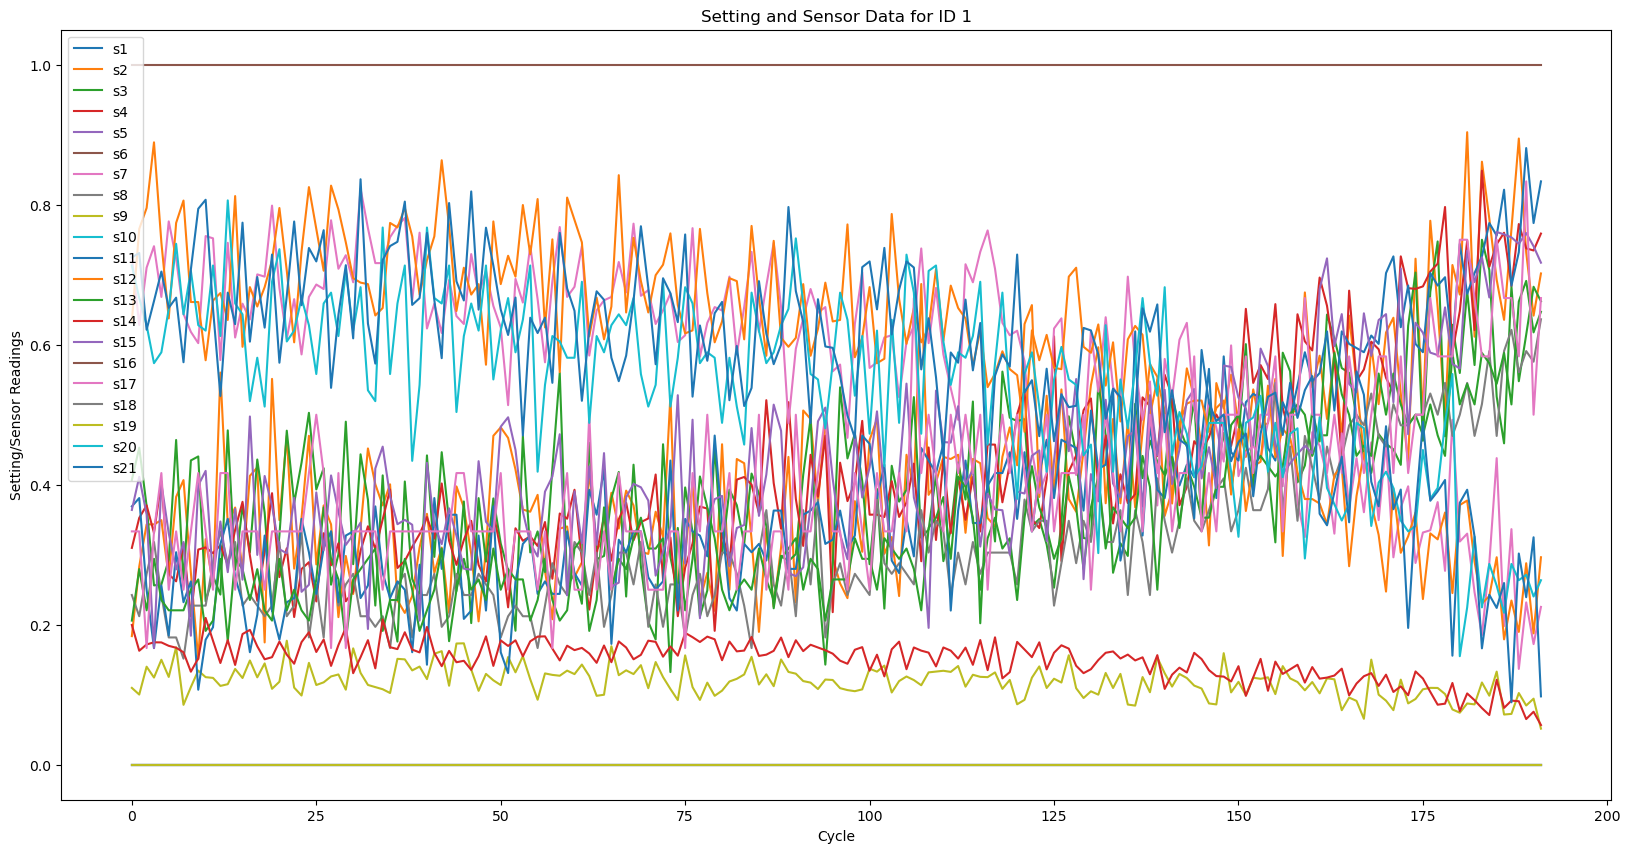

In [49]:
train_df[train_df.ID==1][sensor_cols].plot(figsize=(20, 10))
plt.title('Setting and Sensor Data for ID 1')
plt.xlabel('Cycle')
plt.ylabel('Setting/Sensor Readings')
plt.show()

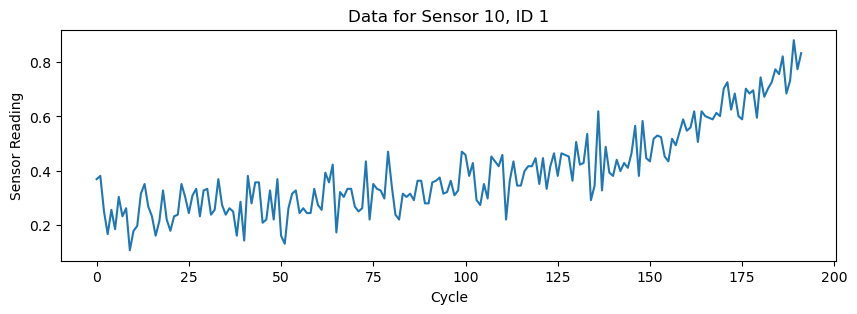

In [50]:
train_df[train_df.ID==1][sensor_cols[10]].plot(figsize=(10, 3))
plt.title('Data for Sensor 10, ID 1')
plt.xlabel('Cycle')
plt.ylabel('Sensor Reading')
plt.show()

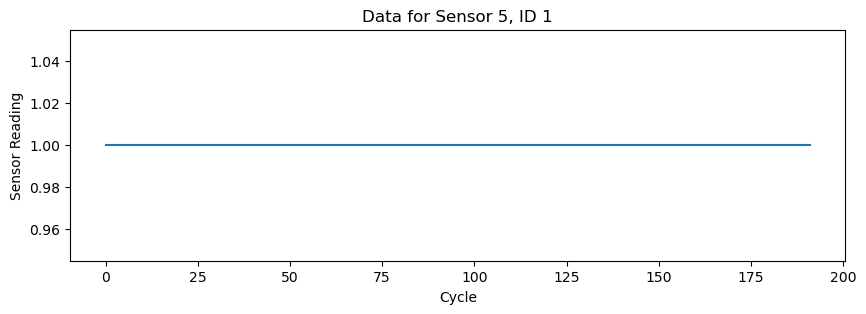

In [51]:
train_df[train_df.ID==1][sensor_cols[5]].plot(figsize=(10, 3))
plt.title('Data for Sensor 5, ID 1')
plt.xlabel('Cycle')
plt.ylabel('Sensor Reading')
plt.show()

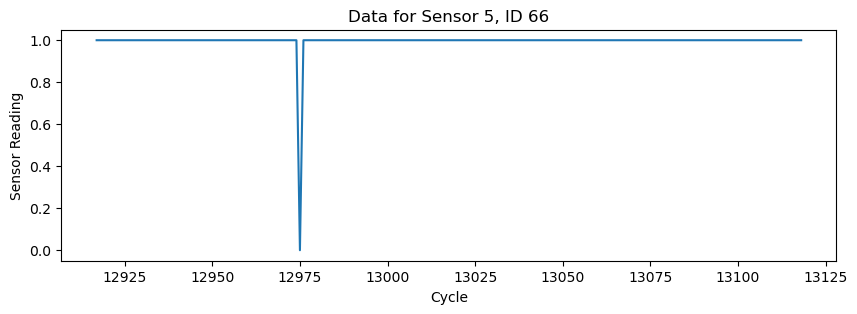

In [52]:
train_df[train_df.ID==66][sensor_cols[5]].plot(figsize=(10, 3))
plt.title('Data for Sensor 5, ID 66')
plt.xlabel('Cycle')
plt.ylabel('Sensor Reading')
plt.show()

#### Are any of the sensor readings correlated to each other?

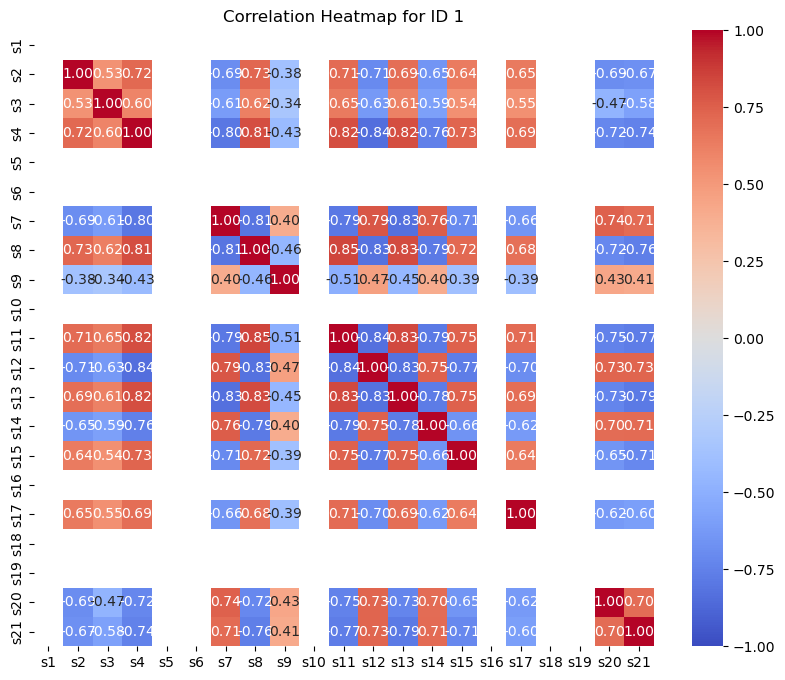

In [53]:
specific_id = 1
train_df_filtered = train_df[train_df['ID'] == specific_id]
sensor_cols = ['s1', 's2', 's3', 's4', 's5','s6','s7','s8','s9','s10'
               ,'s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
train_df_filtered_sensors = train_df_filtered[sensor_cols]
corr = train_df_filtered_sensors.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title(f'Correlation Heatmap for ID {specific_id}')
plt.show()